In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Handle Missing Values.

In [4]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_6996\4081799525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_missing, y=m_missing.index, palette='viridis')


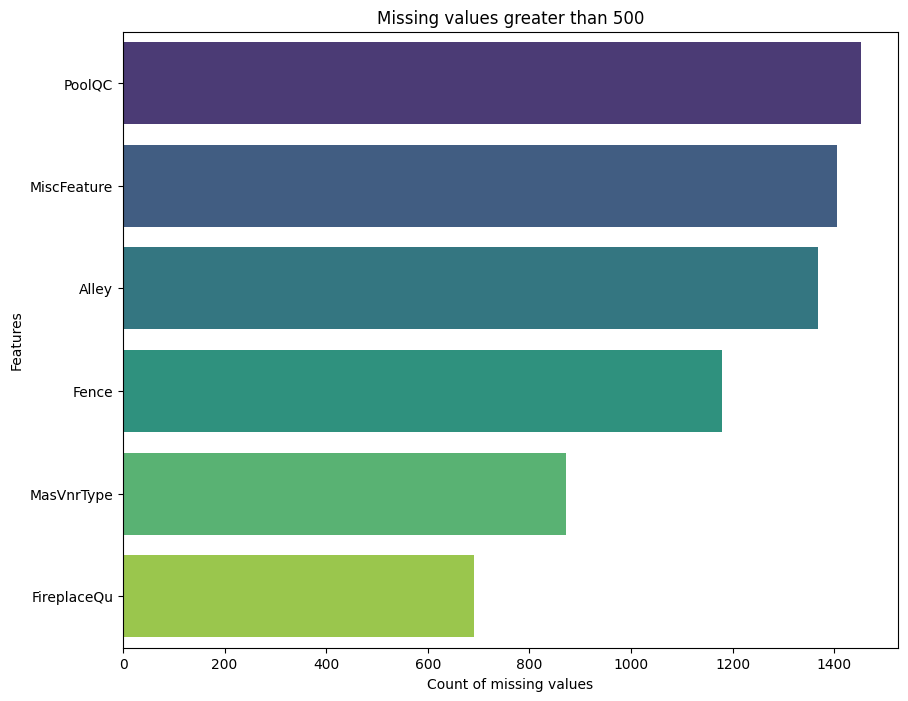

In [6]:
m_missing = missing_values[missing_values>500]
plt.figure(figsize=(10,8))
sns.barplot(x=m_missing, y=m_missing.index, palette='viridis')
plt.title("Missing values greater than 500")
plt.xlabel("Count of missing values")
plt.ylabel("Features")
plt.show()

Drop Columns with high missing data

In [8]:
df = df.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

Handle Categorical Columns

In [11]:
Categorical_columns = df.select_dtypes(include=['object','category']).columns
print("Categorical Columns : ")
print(Categorical_columns)

Categorical Columns : 
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


Label Encoding

In [12]:
label_encoder = LabelEncoder()
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


Find Correlation.

In [21]:
corr_metrics = df.corr()
corr_with_salesprice = corr_metrics['SalePrice'].sort_values(ascending=False)
corr_with_salesprice.head(30)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
CentralAir      0.251328
Name: SalePrice, dtype: float64

Features highly correlated to sale price.

In [17]:
c_features = corr_with_salesprice[corr_with_salesprice>0.25].index
df = df[c_features]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,706,2,65.0,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,978,1,80.0,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,1,486,2,68.0,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1,216,0,60.0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,1,655,2,84.0,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1,0,2,62.0,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,2,790,1,85.0,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,2,275,4,66.0,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,0,49,1,68.0,366,0,0,0,9717,1


Visulaize correlation.

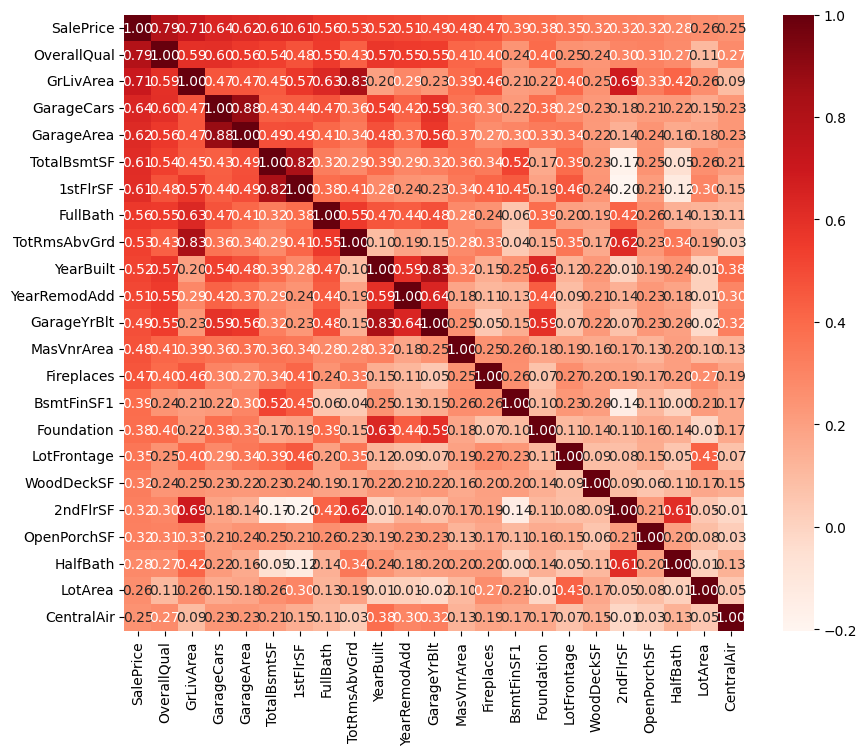

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_with_salesprice[corr_with_salesprice>0.25].index].corr(), annot=True, fmt='.2f',cmap='Reds')
plt.show()

Drop Columns that are correlated with other features than sales price.

In [22]:
df = df.drop(columns=['GarageCars','GarageYrBlt','TotRmsAbvGrd','Foundation','2ndFlrSF','TotalBsmtSF','HalfBath'])

In [23]:
df

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
0,208500,7,1710,548,856,2,2003,2003,196.0,0,706,65.0,0,61,8450,1
1,181500,6,1262,460,1262,2,1976,1976,0.0,1,978,80.0,298,0,9600,1
2,223500,7,1786,608,920,2,2001,2002,162.0,1,486,68.0,0,42,11250,1
3,140000,7,1717,642,961,1,1915,1970,0.0,1,216,60.0,0,35,9550,1
4,250000,8,2198,836,1145,2,2000,2000,350.0,1,655,84.0,192,84,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,1999,2000,0.0,1,0,62.0,0,40,7917,1
1456,210000,6,2073,500,2073,2,1978,1988,119.0,2,790,85.0,349,0,13175,1
1457,266500,7,2340,252,1188,2,1941,2006,0.0,2,275,66.0,0,60,9042,1
1458,142125,5,1078,240,1078,1,1950,1996,0.0,0,49,68.0,366,0,9717,1


In [26]:
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
1068,151400,6,2521,576,1291,2,1973,1973,0.0,1,837,42.0,728,20,3964,1
1008,240000,7,1710,550,1710,2,2004,2005,108.0,1,0,43.0,100,48,12118,1
306,225000,7,2243,746,1122,2,1990,1991,246.0,1,700,116.0,127,44,13474,1
82,245000,8,1563,758,1563,2,2007,2007,468.0,1,33,78.0,144,99,10206,1
250,76500,3,1306,0,1306,1,1940,1966,0.0,0,0,55.0,263,0,5350,1


In [27]:
df.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageArea        0
1stFlrSF          0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
OpenPorchSF       0
LotArea           0
CentralAir        0
dtype: int64

In [28]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [29]:
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
LotArea         0
CentralAir      0
dtype: int64

Create Variables to train the model.

In [30]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

Splitting data into Train and Test Split.

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2,random_state=42)

Building and Traning Model.

In [32]:
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate = 0.01,
    max_depth = 6,
    n_estimators = 1000,
    subsample = 0.65,
    random_state = 42
) 

model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

Predictions.

In [33]:
y_pred = model.predict(X_test)

Model Evaluation.

In [34]:
mean_abs_err = mean_absolute_error(Y_test,y_pred)
print('Mean Absolute Error : ', mean_abs_err)
r2_score = r2_score(Y_test,y_pred)
print('r2 Score : ', r2_score)

Mean Absolute Error :  18153.68679098887
r2 Score :  0.9002131997310288


Save the model

In [35]:
joblib.dump(model,'xgb_model.jb')

['xgb_model.jb']

In [36]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'LotArea',
       'CentralAir'],
      dtype='object')